In [1]:
import os
import matplotlib.pyplot as plt
import os
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis
import numpy as np
import imageio
import os
import cv2
vfrom scipy.optimize import curve_fit
from amftrack.pipeline.final_analysis.density_wave import get_wave_fit, S, dS, wave, dwave
import matplotlib.patches as mpatches
from scipy.signal import savgol_filter

%matplotlib widget
plt.style.use('presentation.mplstyle')
plate_select = ['127','129','130','1014','1023','1037','1042','52','56','839','938','1076','84','89','91']
plate_select = [int(plate) for plate in plate_select]

c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
analysis_folders = get_analysis_folders()


In [8]:
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders)


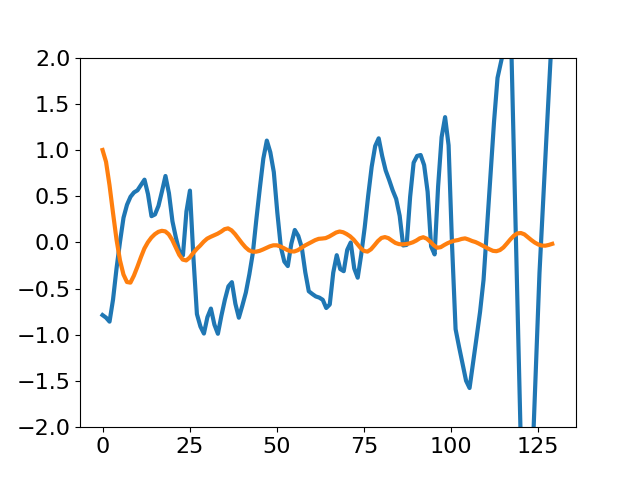

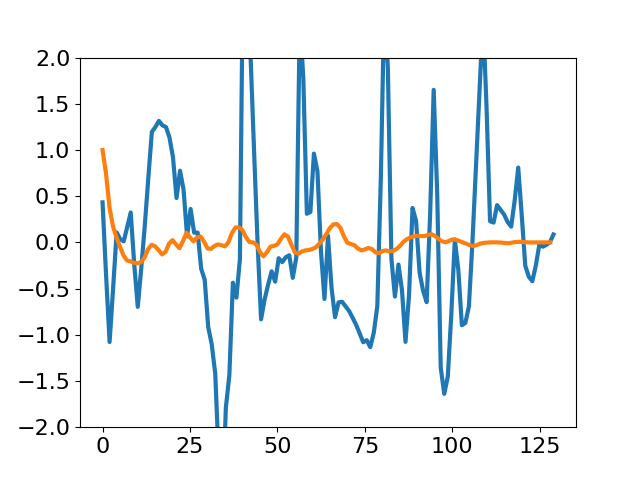

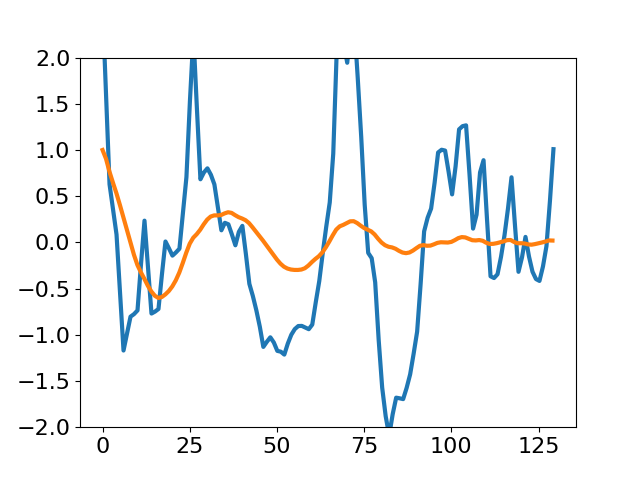

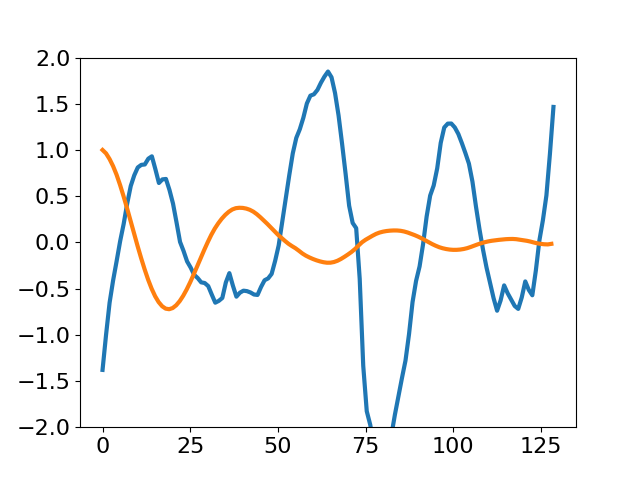

In [91]:
plate_select = [32,28,30,1014,1023,1037,1042,52,56,938,1076,84,89,91,127,129,94,152,792]
plate_select = [32,28,30,1014,1023,1037,1042,52,56,938,1076,84,89,91,127,129,94,152,792,1048,1045]
plate_select = [52,84,1048,1045]

plt.close("all")
signals = []
for plate in plate_select:
    fig, ax = plt.subplots()
    for smooth_length in [71]:
        table = time_plate_info.loc[time_plate_info["Plate"]==plate]
        table = table.loc[table["time_since_begin"]/pd.Timedelta(hours=1)<=130]
        xt,yt = table['time_since_begin']/pd.Timedelta(hours=1),table['tot_length_study']
        f = interp1d(xt, yt)
        frequ = 1
        deb = np.min(xt)
        end = np.max(xt)
        x = np.linspace(deb,end,int((end-deb)*frequ)+1)
        resampled = pd.DataFrame({'time':x,'speed':f(x)})
        yt_smooth = savgol_filter(resampled['speed'], smooth_length, 3)
        # yt_smooth=table['tot_length_study'].rolling(30,center= True).mean()
        signal = resampled['speed']-yt_smooth
        signal_ZMUV = (signal-np.mean(signal))/np.std(signal)
        # popt_f,cov = curve_fit(S, xt,yt,bounds = ([0,0,-np.inf],[np.inf,np.inf,np.inf]),p0=[2e6,1,0])
        ax.plot(x,signal_ZMUV)
        s = signal_ZMUV
        autoc = autocorr(s)
        autoc = autoc/autoc.max()
        ax.plot(autoc,label='linear regression')
        ax.set_ylim(-2,2)
        if len(autoc)>=125:
            signals.append(autoc[:125])
        
        # ax.plot(xt,yt))
        # ax.plot(x,yt_smooth
        # break

In [1]:
timestep = {32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:1000,52 : 75,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:100,152:35,792:60,1048:60,1045:50}

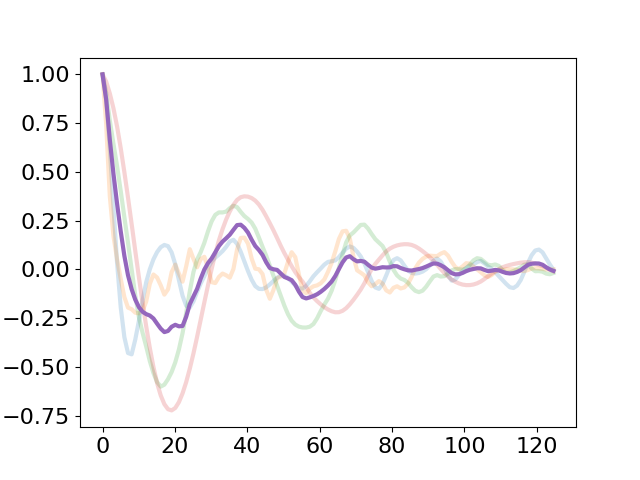

In [92]:
fig, ax = plt.subplots()
for signal in signals:
    ax.plot(x[:125],signal,alpha = 0.2)
ax.plot(x[:125],np.mean(signals,axis=0))

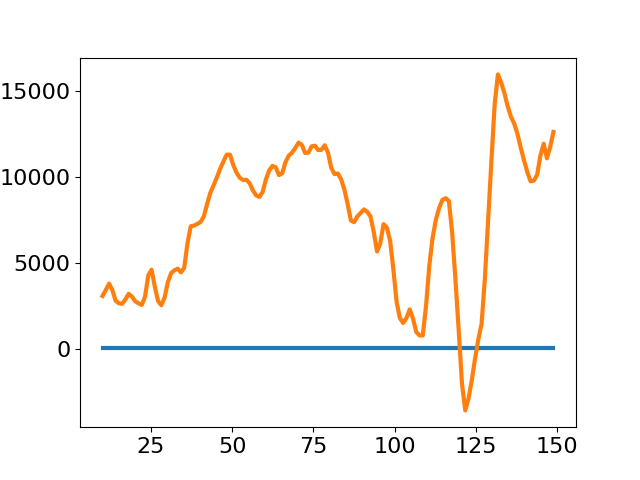

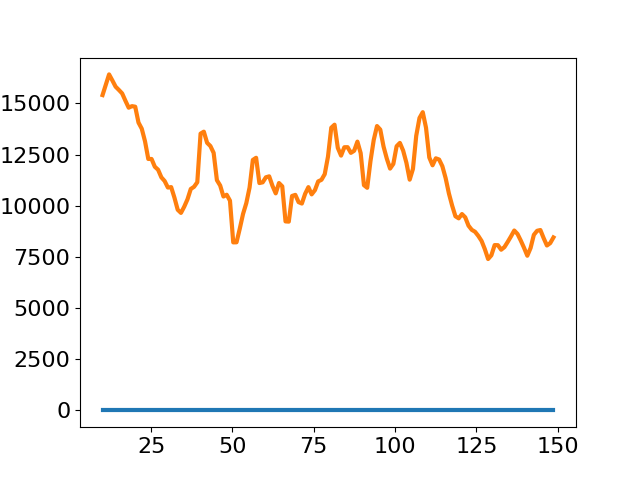

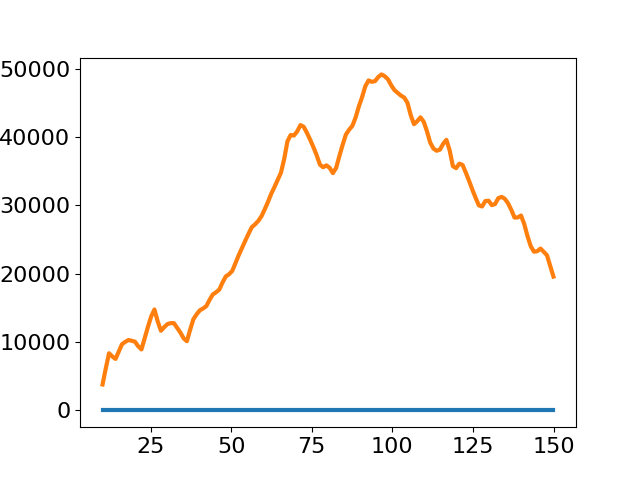

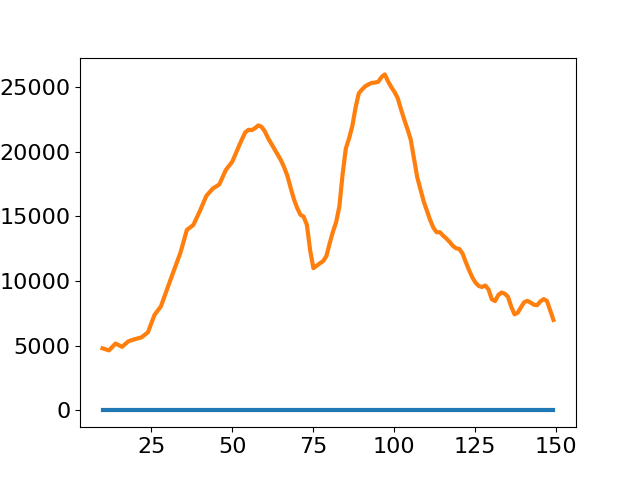

In [90]:
plt.close("all")
signals = []
lapse= 10
plate_select = [52,84,1048,1045]

for plate in plate_select:
    fig, ax = plt.subplots()
    for smooth_length in [71]:
        table = time_plate_info.loc[time_plate_info["Plate"]==plate]
        table = table.loc[table["time_since_begin"]/pd.Timedelta(hours=1)<=150]
        xt,yt = table['time_since_begin']/pd.Timedelta(hours=1),table['tot_length_study']
        f = interp1d(xt, yt)
        frequ = 1
        deb = np.min(xt)
        end = np.max(xt)
        x = np.linspace(deb,end,int((end-deb)*frequ)+1)
        resampled = pd.DataFrame({'time':x,'speed':f(x)})
        ax.plot(x,resampled.diff(lapse)/lapse)

In [ ]:
popt_f,cov = curve_fit(S, xt,yt,bounds = ([0,0,-np.inf],[np.inf,np.inf,np.inf]),p0=[2e6,1,0]

In [30]:
popt_f

array([2.00000000e+06, 5.20439282e+05, 1.88661711e-01])

In [20]:
popt_f,cov = curve_fit(S, xt,yt,bounds = ([0,-np.inf,-np.inf],[np.inf,0,np.inf,np.inf]),p0=[1,1,0])


ValueError: operands could not be broadcast together with shapes (3,) (4,) 